In [745]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [746]:
df=pd.read_csv(r'data\breast_cancer_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [747]:
#check about nulls in each column
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null_sum":null,"Ratio":ratio})

,Null_sum,Ratio
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


In [748]:
#drop weak corelation columnes with target
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [749]:
df.duplicated().sum()

np.int64(0)

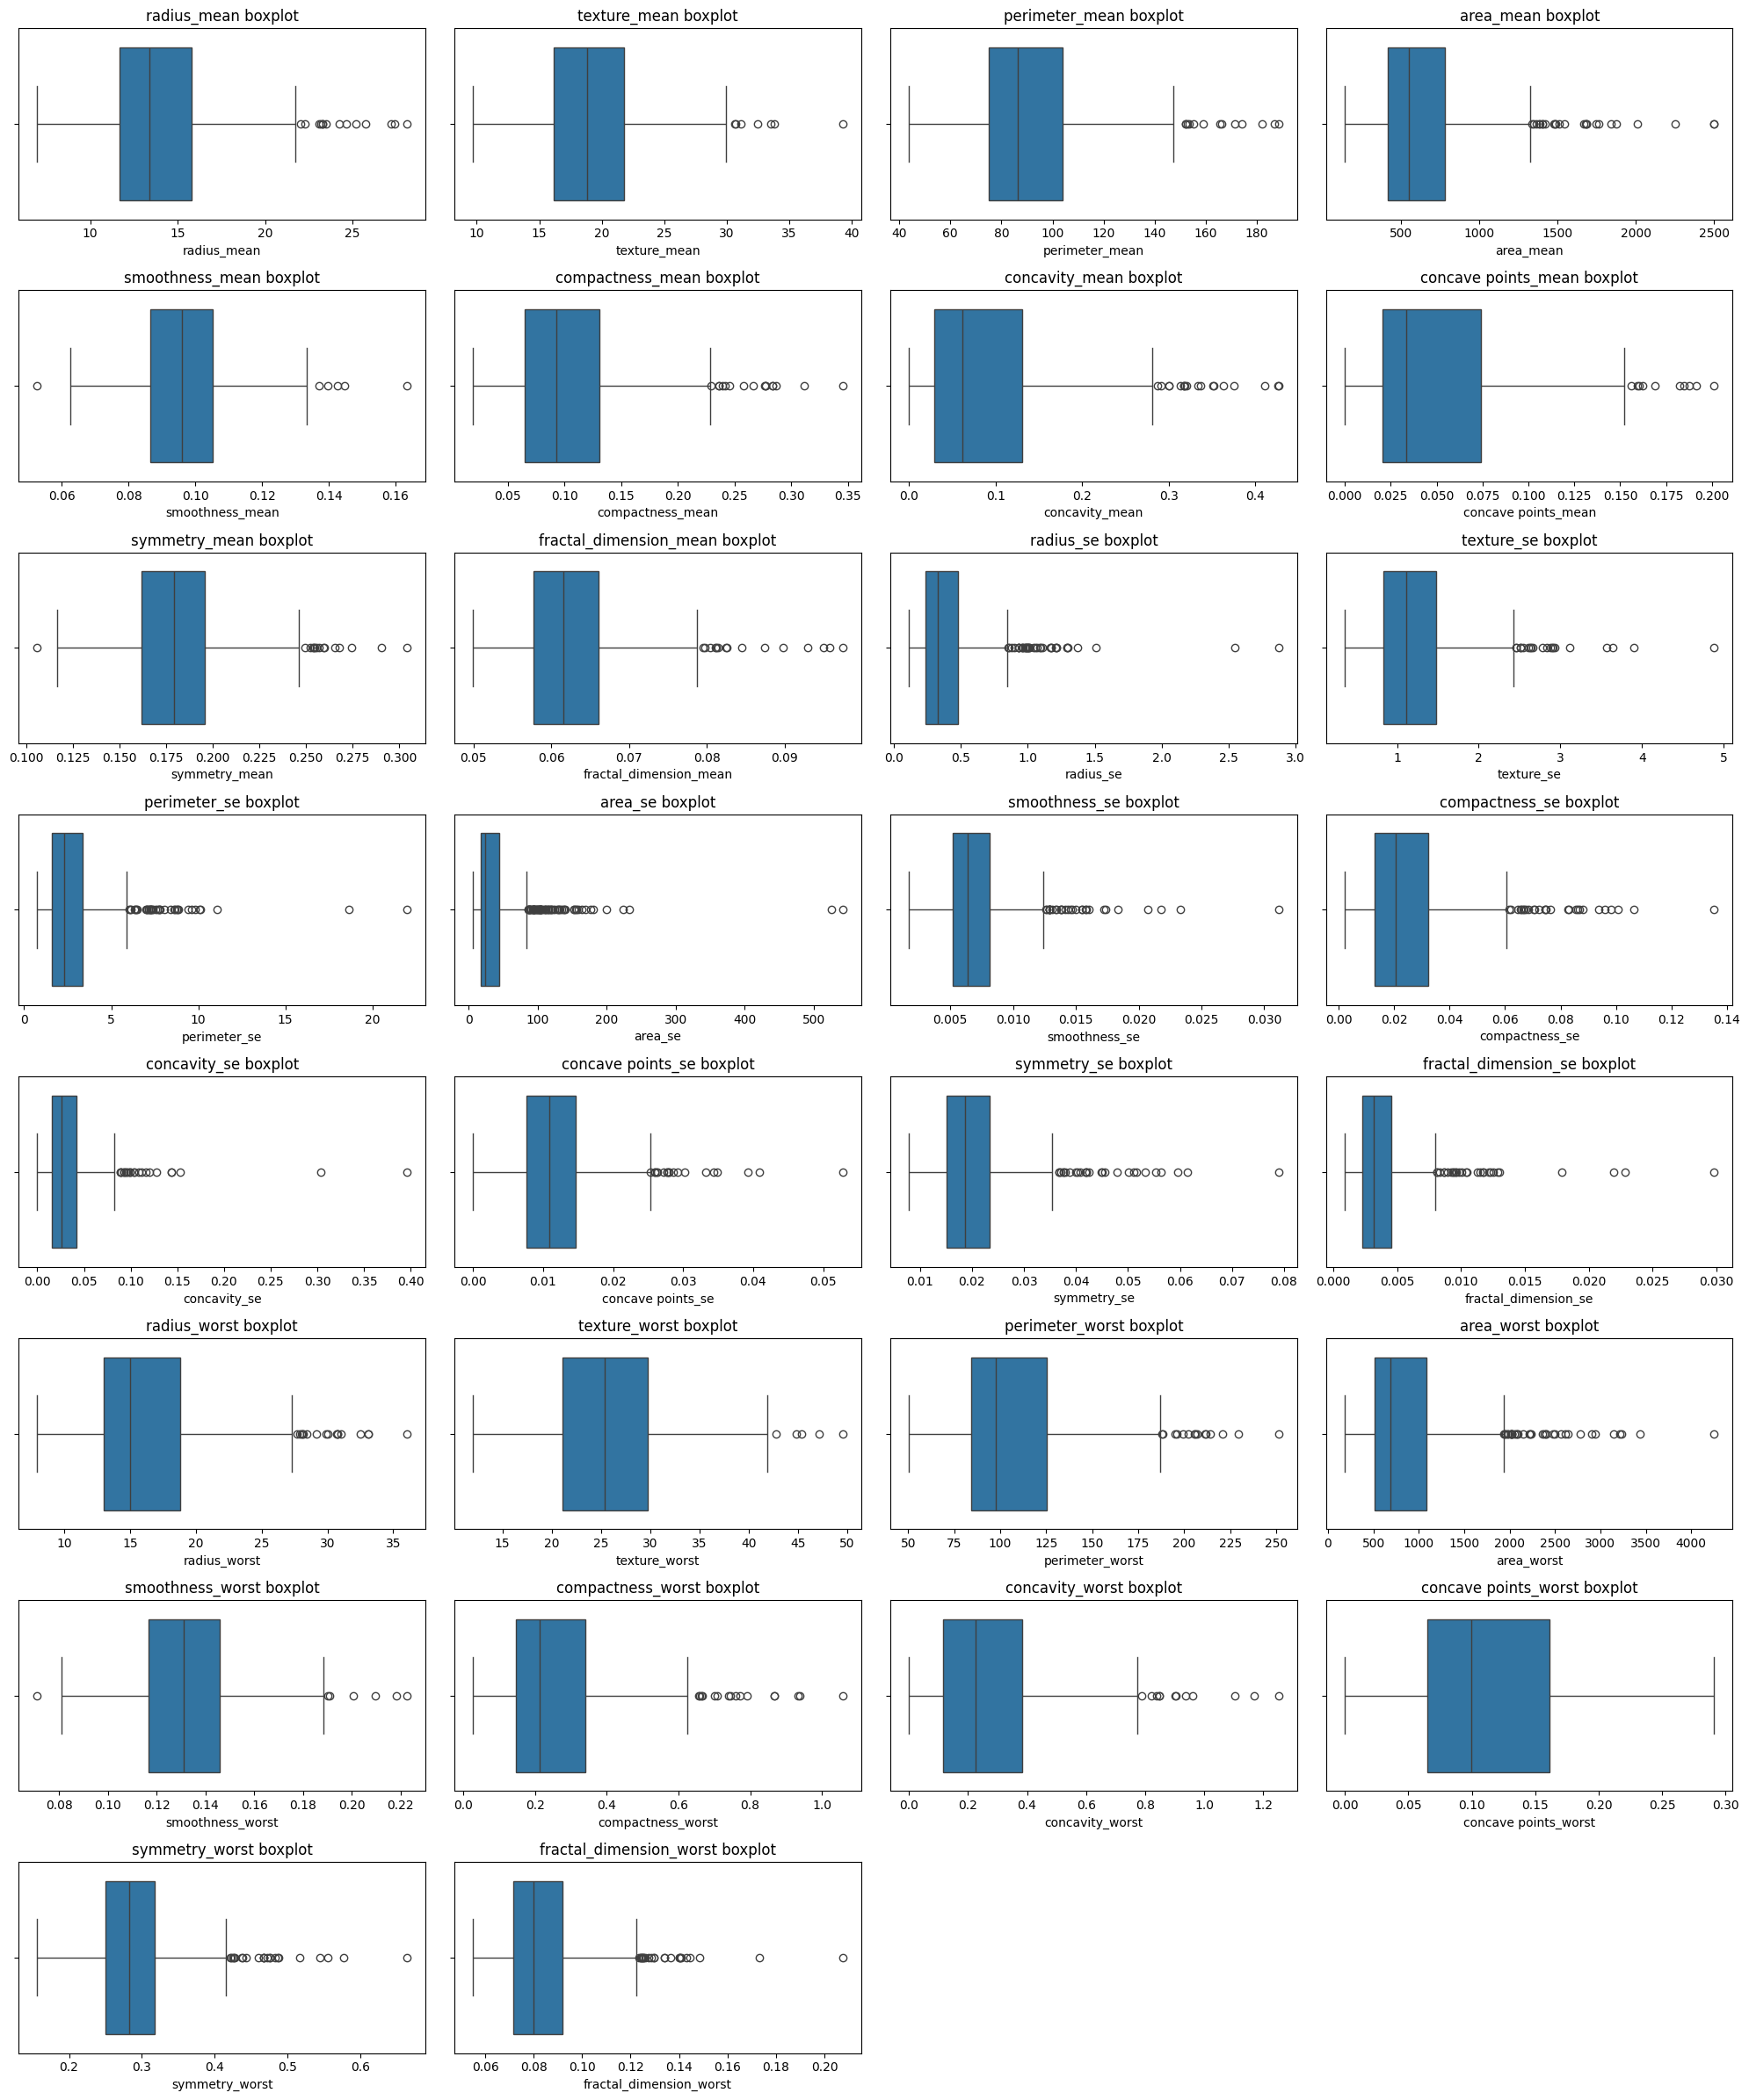

In [750]:
#check about outliers

num_cols = df.select_dtypes("number").columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], orient="h")
    axes[i].set_title(f"{col} boxplot")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [751]:
#remove outliers
for col in num_cols:
  Q1=df[col].quantile(.25)
  Q3=df[col].quantile(.75)
  IQR=Q3-Q1
  lower_Fence=Q1-1.5*IQR
  upper_Fence=Q3+1.5*IQR
  lower_outliers=df[df[col]<lower_Fence][col].values
  upper_outliers=df[df[col]>upper_Fence][col].values
  df[col].replace(lower_outliers,lower_Fence,inplace=True)
  df[col].replace(upper_outliers,upper_Fence,inplace=True)

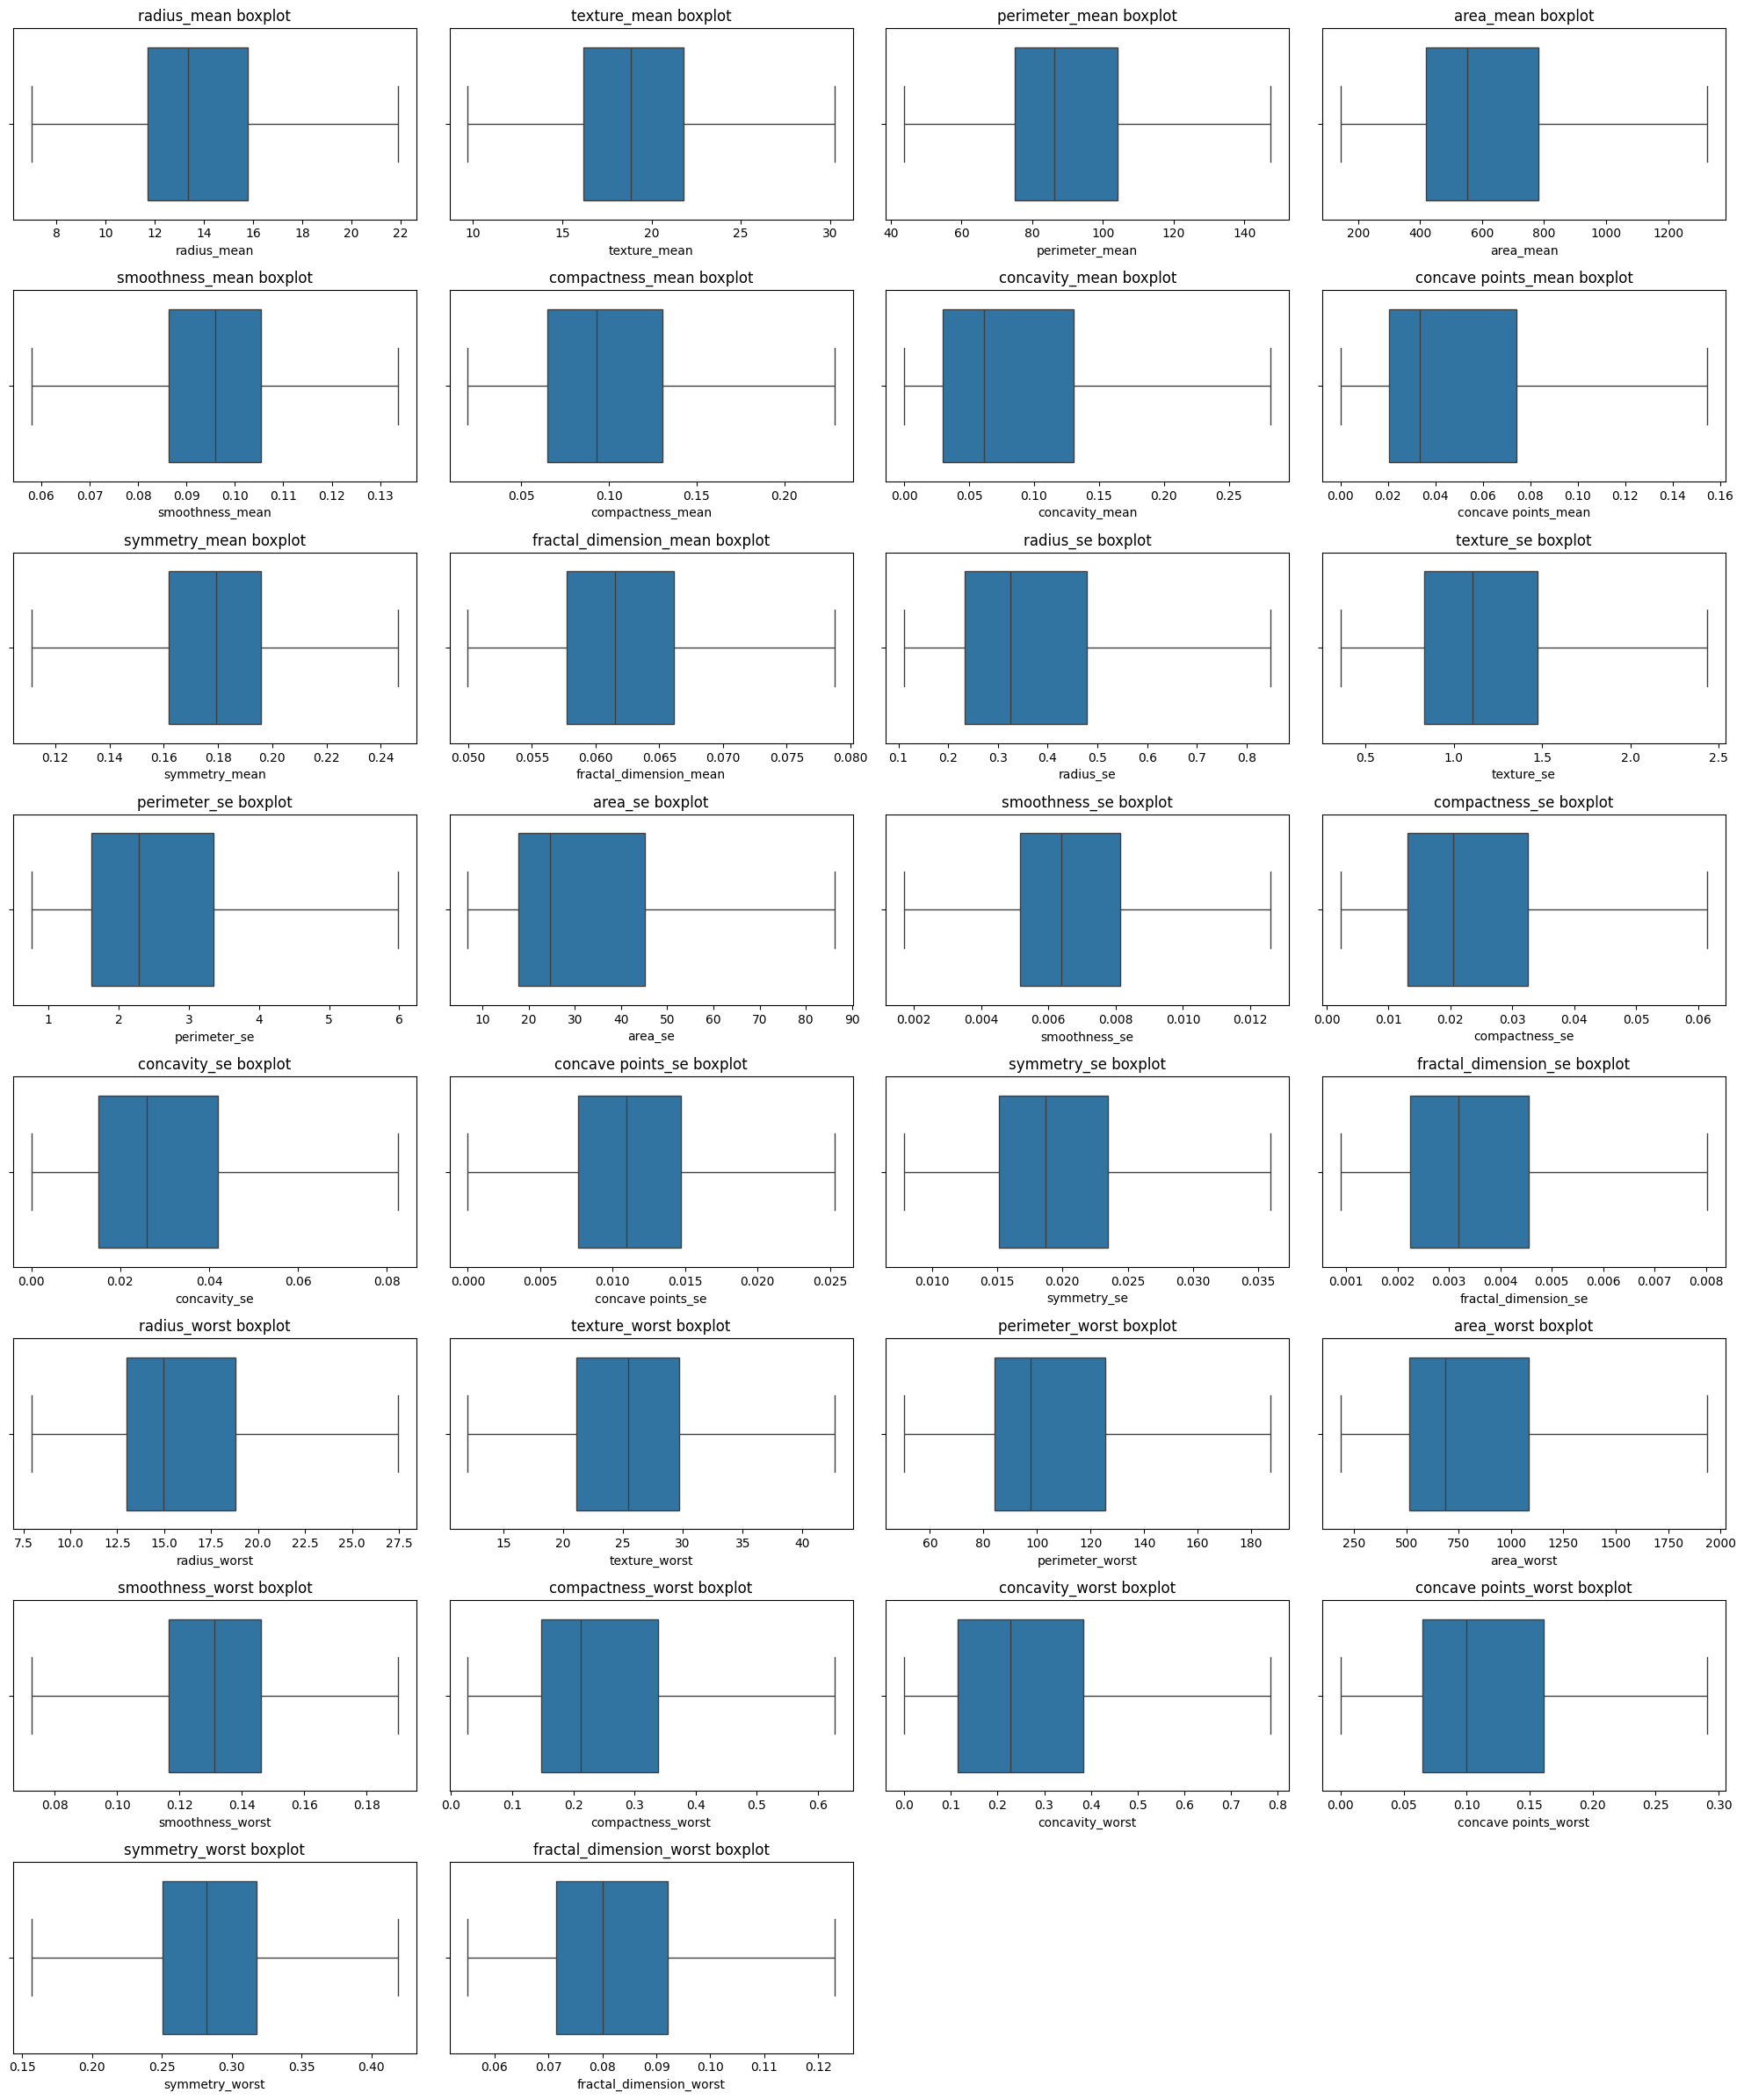

In [752]:
#check again about outliers

num_cols = df.select_dtypes("number").columns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], orient="h")
    axes[i].set_title(f"{col} boxplot")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

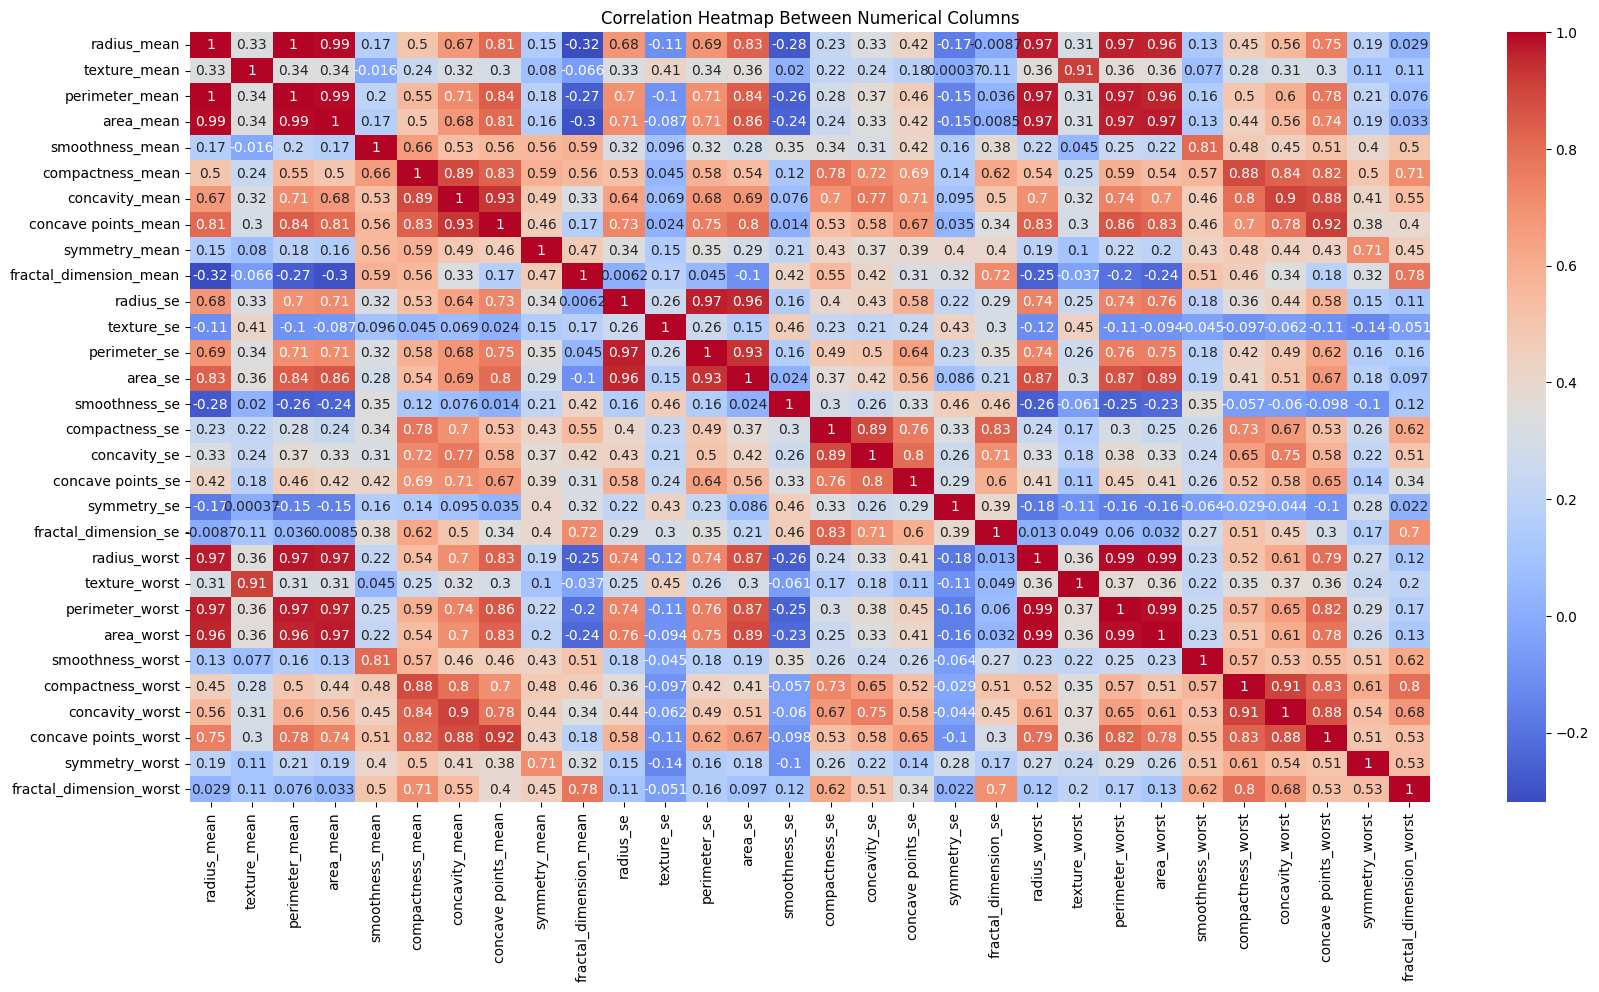

In [753]:
#heatmap to display the corelation between numerical data
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Numerical Columns')
plt.show()

In [754]:
# show number of unique values in each column and their datatypes
dtypes=df.dtypes
nuniq=df.nunique()
pd.DataFrame({'dtypes':dtypes,'nunique':nuniq})

,dtypes,nunique
diagnosis,object,2
radius_mean,float64,443
texture_mean,float64,473
perimeter_mean,float64,511
area_mean,float64,515
smoothness_mean,float64,470
compactness_mean,float64,522
concavity_mean,float64,520
concave points_mean,float64,533
symmetry_mean,float64,419


Number of B: 357
Number of M: 212


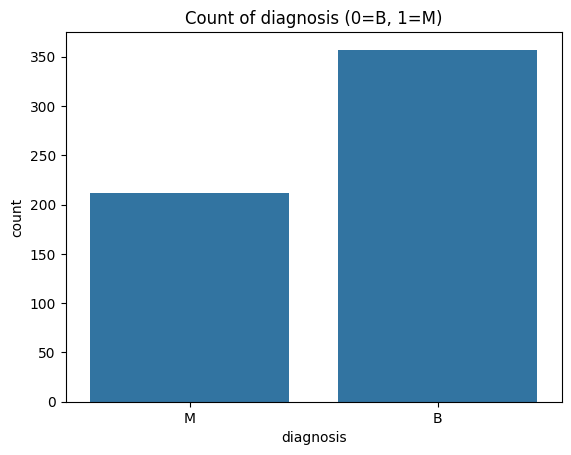

In [755]:
diagnosis_counts = df['diagnosis'].value_counts()
B_count = diagnosis_counts[0]
M_count = diagnosis_counts[1]

print(f"Number of B: {B_count}")
print(f"Number of M: {M_count}")
sns.countplot(x='diagnosis', data=df)
plt.title('Count of diagnosis (0=B, 1=M)')
plt.show()

then data is balanced

In [756]:
#convert some columns into category datatype
cols=["diagnosis"]
df[cols]=df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,category,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [757]:
#split the data
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [758]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to the target column
y = le.fit_transform(df['diagnosis'])


In [759]:
# Show correlation values between each feature and the target
temp_df = x.copy()
temp_df['diagnosis'] = y

correlations = temp_df.corr(numeric_only=True)['diagnosis'].drop('diagnosis').sort_values(ascending=False)
print(correlations)

perimeter_worst            0.800618
area_worst                 0.794640
radius_worst               0.793938
concave points_worst       0.793566
concave points_mean        0.788099
perimeter_mean             0.759006
area_mean                  0.752786
radius_mean                0.745217
area_se                    0.739068
concavity_mean             0.727168
concavity_worst            0.683565
perimeter_se               0.646875
radius_se                  0.642399
compactness_worst          0.611083
compactness_mean           0.608494
texture_worst              0.457663
concave points_se          0.450133
smoothness_worst           0.423390
texture_mean               0.419123
symmetry_worst             0.419058
concavity_se               0.398120
smoothness_mean            0.366931
symmetry_mean              0.334536
compactness_se             0.331837
fractal_dimension_worst    0.328719
fractal_dimension_se       0.154061
texture_se                -0.000152
fractal_dimension_mean    -0

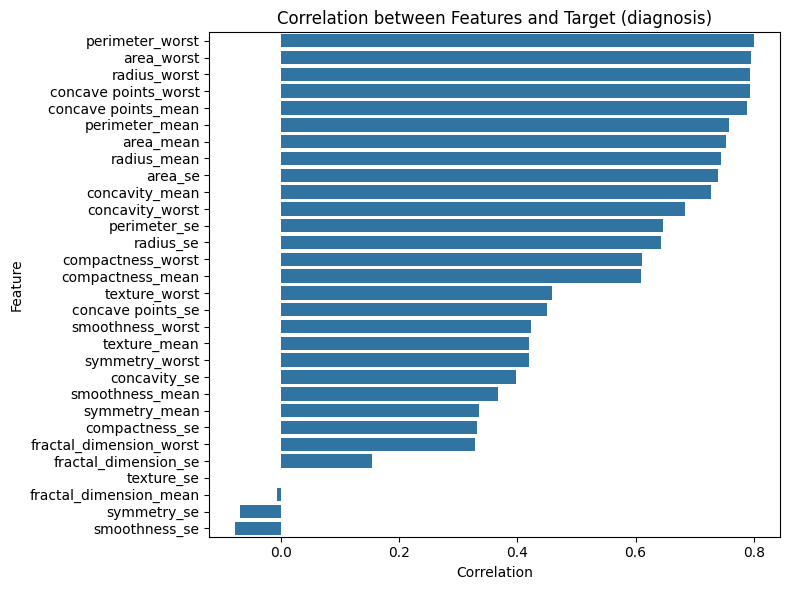

In [760]:
# Show correlation between each feature and the target
import pandas as pd

# Create a temporary DataFrame with features and target
temp_df = x.copy()
temp_df['diagnosis'] = y

correlations = temp_df.corr(numeric_only=True)['diagnosis'].drop('diagnosis').sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation between Features and Target (diagnosis)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# remove features which are highly correlated (>= 0.8) to reduce redundancy and multicollinearity.

# Compute the absolute correlation matrix
corr_matrix = x.corr().abs()

# Extract the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation >= 0.8
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

# Drop those highly correlated features directly from x
x = x.drop(columns=to_drop)

# Output dropped features
print("Dropped features due to high correlation (>= 0.9):")
print(to_drop)

Dropped features due to high correlation (>= 0.9):
['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [762]:
#normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
num_cols=x.select_dtypes('number').columns
scaler=MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols]=scaler.transform(x[num_cols])
x

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst,fractal_dimension_worst
0,0.737918,0.032627,0.798006,1.000000,0.966716,0.998611,1.000000,0.262832,0.429967,0.789631,0.788803,1.000000,0.939532
1,0.910852,0.392501,0.353473,0.283215,0.517751,0.233067,0.586041,0.180188,0.322246,0.182742,0.213975,0.451171,0.499926
2,0.851867,0.561967,0.681788,0.671573,0.707840,0.348385,0.860205,0.205743,0.407120,0.638077,0.520621,0.779745,0.478741
3,0.297540,0.519601,1.000000,1.000000,1.000000,1.000000,0.521061,0.383712,0.678717,1.000000,1.000000,1.000000,1.000000
4,0.892084,0.225469,0.558967,0.542057,0.515533,0.308093,0.875941,0.203043,0.897096,0.377331,0.344683,0.304207,0.319847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.977210,0.617482,0.700277,0.461288,0.454142,0.217784,1.000000,0.431929,0.787907,0.449901,0.116034,0.188464,0.237016
565,0.881359,0.902849,0.525951,0.401548,0.473373,0.186523,0.887201,1.000000,0.372161,0.370918,0.395256,0.383400,0.166691
566,0.644748,0.894570,0.350964,0.396291,0.353550,0.226468,0.467883,0.344656,0.384457,0.591666,0.188689,0.248620,0.340739
567,0.912863,0.955442,0.790082,1.000000,0.950444,0.701633,0.833616,0.595386,0.441253,1.000000,0.546976,0.960213,1.000000


In [763]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [764]:

# 80% for training, 20% for testing, with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with max_depth and max_features
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features='sqrt', random_state=42)
rf.fit(x_train, y_train)

# Make predictions on both training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate and print the accuracies
rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Testing Accuracy : {rf_test_accuracy:.4f}")

Training Accuracy: 0.9604
Testing Accuracy : 0.9386


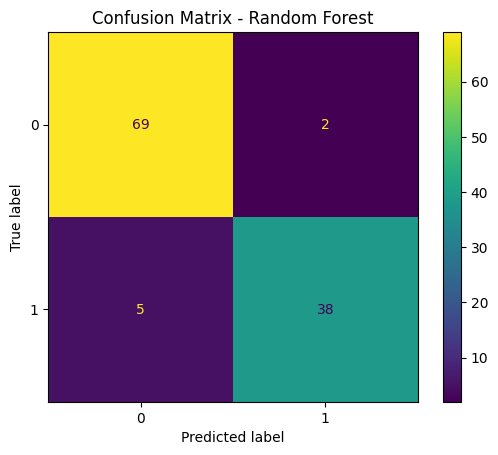

Confusion Matrix:
[[69  2]
 [ 5 38]]
Accuracy : 0.9386
Precision: 0.9500
Recall   : 0.8837
F1 Score : 0.9157


In [765]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = rf.predict(x_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

In [766]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train, y_train)

# Predict on train and test sets
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Calculate accuracy
dt_train_acc = accuracy_score(y_train, y_pred_train)
dt_test_acc = accuracy_score(y_test, y_pred_test)

# Print both accuracies
print(f"Train Accuracy: {dt_train_acc:.4f}")
print(f"Test Accuracy:  {dt_test_acc:.4f}")


Train Accuracy: 0.9758
Test Accuracy:  0.9211


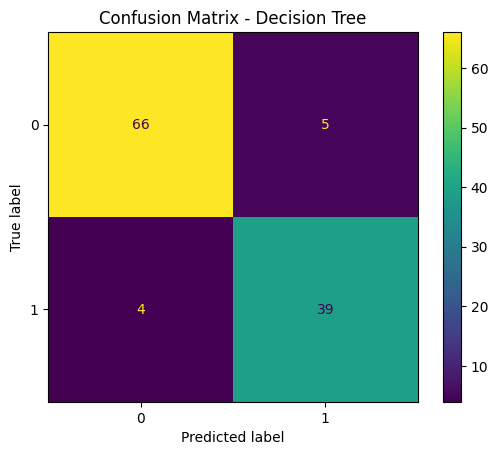

Confusion Matrix:
[[66  5]
 [ 4 39]]
Accuracy : 0.9211
Precision: 0.8864
Recall   : 0.9070
F1 Score : 0.8966


In [767]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = dt.predict(x_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Print confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

In [768]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# Calculate accuracy
xg_train_acc = accuracy_score(y_train, y_train_pred)
xg_test_acc = accuracy_score(y_test, y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {xg_train_acc:.4f}")
print(f"Test Accuracy:  {xg_test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy:  0.9561


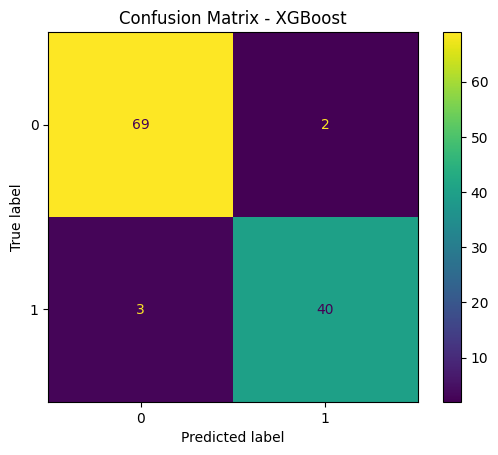

Confusion Matrix:
[[69  2]
 [ 3 40]]
Accuracy : 0.9561
Precision: 0.9524
Recall   : 0.9302
F1 Score : 0.9412


In [769]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = xgb_model.predict(x_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, x_test, y_test)
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Print confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

In [770]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)

# Calculate accuracy
gr_train_acc = accuracy_score(y_train, y_train_pred)
gr_test_acc = accuracy_score(y_test, y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {gr_train_acc:.4f}")
print(f"Test Accuracy:  {gr_test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy:  0.9474


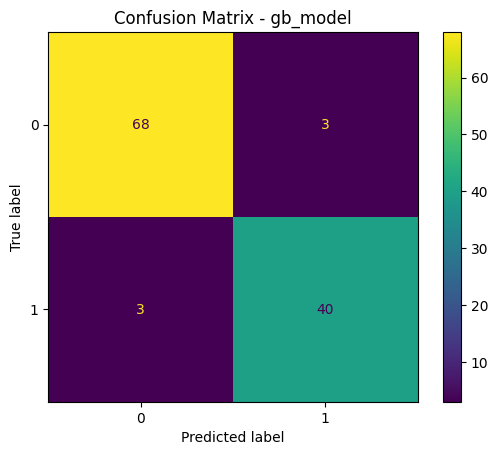

Confusion Matrix:
[[68  3]
 [ 3 40]]
Accuracy : 0.9474
Precision: 0.9302
Recall   : 0.9302
F1 Score : 0.9302


In [771]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = gb_model.predict(x_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(gb_model, x_test, y_test)
plt.title("Confusion Matrix - gb_model")
plt.show()

# Print confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

In [772]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create and train a single-layer neural network with a custom activation function
perceptron = MLPClassifier(hidden_layer_sizes=(), activation='logistic', max_iter=1000, random_state=42)
perceptron.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = perceptron.predict(x_train)
y_test_pred = perceptron.predict(x_test)

# Calculate accuracy
pe_train_acc = accuracy_score(y_train, y_train_pred)
pe_test_acc = accuracy_score(y_test, y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {pe_train_acc:.4f}")
print(f"Test Accuracy:  {pe_test_acc:.4f}")

Train Accuracy: 0.9253
Test Accuracy:  0.9474


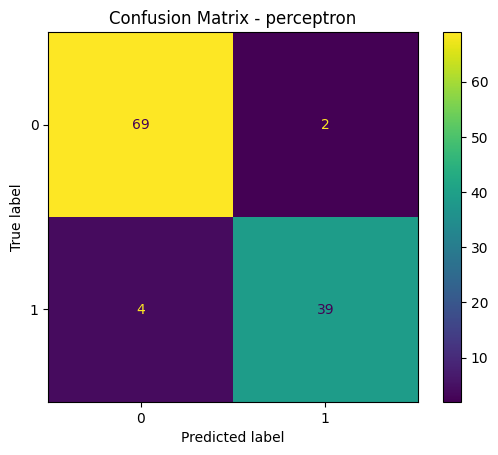

Confusion Matrix:
[[69  2]
 [ 4 39]]
Accuracy : 0.9474
Precision: 0.9512
Recall   : 0.9070
F1 Score : 0.9286


In [773]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = perceptron.predict(x_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(perceptron, x_test, y_test)
plt.title("Confusion Matrix - perceptron")
plt.show()

# Print confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

In [774]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create and train the MLP model with two hidden layers and logistic activation
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

# Calculate accuracy
ml_train_acc = accuracy_score(y_train, y_train_pred)
ml_test_acc = accuracy_score(y_test, y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {ml_train_acc:.4f}")
print(f"Test Accuracy:  {ml_test_acc:.4f}")

Train Accuracy: 0.9604
Test Accuracy:  0.9649


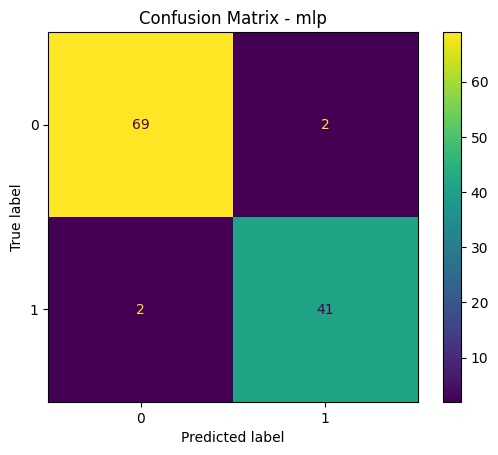

Confusion Matrix:
[[69  2]
 [ 2 41]]
Accuracy : 0.9649
Precision: 0.9535
Recall   : 0.9535
F1 Score : 0.9535


In [775]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = mlp.predict(x_test)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(mlp, x_test, y_test)
plt.title("Confusion Matrix - mlp")
plt.show()

# Print confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

In [776]:
# Create a DataFrame to summarize the results making a comparison to choose the best model
results = {
    "Model": [
        "Random Forest",
        "Decision Tree",
        "XGBoost",
        "Gradient Boosting",
        "Perceptron (single-layer neural network)",
        "MLP (multiple-layer Neural Network)"
    ],
    "Train Accuracy": [
        rf_train_accuracy,
        dt_train_acc,
        xg_train_acc,
        gr_train_acc,
        pe_train_acc,
        ml_train_acc
    ],
    "Test Accuracy": [
        rf_test_accuracy,
        dt_test_acc,
        xg_test_acc,
        gr_test_acc,
        pe_test_acc,
        ml_test_acc
    ],
    "Precision": [
        precision_score(y_test, rf.predict(x_test)),
        precision_score(y_test, dt.predict(x_test)),
        precision_score(y_test, xgb_model.predict(x_test)),
        precision_score(y_test, gb_model.predict(x_test)),
        precision_score(y_test, perceptron.predict(x_test)),
        precision_score(y_test, mlp.predict(x_test))
    ],
    "Recall": [
        recall_score(y_test, rf.predict(x_test)),
        recall_score(y_test, dt.predict(x_test)),
        recall_score(y_test, xgb_model.predict(x_test)),
        recall_score(y_test, gb_model.predict(x_test)),
        recall_score(y_test, perceptron.predict(x_test)),
        recall_score(y_test, mlp.predict(x_test))
    ],
    "F1 Score": [
        f1_score(y_test, rf.predict(x_test)),
        f1_score(y_test, dt.predict(x_test)),
        f1_score(y_test, xgb_model.predict(x_test)),
        f1_score(y_test, gb_model.predict(x_test)),
        f1_score(y_test, perceptron.predict(x_test)),
        f1_score(y_test, mlp.predict(x_test))
    ]
}

df_results = pd.DataFrame(results)
print(df_results)

                                      Model  Train Accuracy  Test Accuracy  \
0                             Random Forest        0.960440       0.938596   
1                             Decision Tree        0.975824       0.921053   
2                                   XGBoost        1.000000       0.956140   
3                         Gradient Boosting        1.000000       0.947368   
4  Perceptron (single-layer neural network)        0.925275       0.947368   
5       MLP (multiple-layer Neural Network)        0.960440       0.964912   

   Precision    Recall  F1 Score  
0   0.950000  0.883721  0.915663  
1   0.886364  0.906977  0.896552  
2   0.952381  0.930233  0.941176  
3   0.930233  0.930233  0.930233  
4   0.951220  0.906977  0.928571  
5   0.953488  0.953488  0.953488  


The best model is MLP (Multi-layer Perceptron) because it achieved the highest test accuracy (0.964912) and the highest F1 Score (0.953488), and its performance is also well-balanced between training and testing

In [780]:
# Define the selected features
selected_features = [
    'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'smoothness_se', 'compactness_se', 'symmetry_se', 'symmetry_worst',
    'fractal_dimension_worst'
]

# Display the minimum and maximum values for each selected feature
for feature in selected_features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    print(f"{feature}: Min = {min_val}, Max = {max_val}")

radius_mean: Min = 6.981, Max = 21.9
texture_mean: Min = 9.71, Max = 30.244999999999997
smoothness_mean: Min = 0.057975, Max = 0.133695
compactness_mean: Min = 0.01938, Max = 0.22861999999999996
symmetry_mean: Min = 0.11119999999999995, Max = 0.24640000000000006
fractal_dimension_mean: Min = 0.04996, Max = 0.07874999999999999
radius_se: Min = 0.1115, Max = 0.84865
texture_se: Min = 0.3602, Max = 2.43415
smoothness_se: Min = 0.001713, Max = 0.012611500000000001
compactness_se: Min = 0.002252, Max = 0.061505
symmetry_se: Min = 0.007882, Max = 0.035960000000000006
symmetry_worst: Min = 0.1565, Max = 0.41915
fractal_dimension_worst: Min = 0.05504, Max = 0.12301


In [777]:
# Show correlation values between each feature and the target
temp_df = x.copy()
temp_df['diagnosis'] = y

correlations = temp_df.corr(numeric_only=True)['diagnosis'].drop('diagnosis').sort_values(ascending=False)
print(correlations)

radius_mean                0.745217
radius_se                  0.642399
compactness_mean           0.608494
texture_mean               0.419123
symmetry_worst             0.419058
smoothness_mean            0.366931
symmetry_mean              0.334536
compactness_se             0.331837
fractal_dimension_worst    0.328719
texture_se                -0.000152
fractal_dimension_mean    -0.006801
symmetry_se               -0.069606
smoothness_se             -0.077796
Name: diagnosis, dtype: float64


In [778]:
x.shape

(569, 13)

there is 13 feature in x used in mlp model

In [779]:
import joblib

joblib.dump(mlp, "mlp_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']